In [3]:
%matplotlib notebook
from QDP import qdp
import os
import os.path
import numpy as np
from scipy.stats import poisson
import h5py
import matplotlib.pyplot as plt
import math
from scipy.optimize import leastsq,curve_fit

In [4]:
def open_data(exp_id):
    ## basic paths
    data_master_path='D:/Data/' # D:\ is local SSD in the main experiment computer
    analysis_local_path='D:/Analysis/' # D:\ is local SSD in the main experiment computer
    analysis_master_path='Y:/Analysis/' # Y:\ is network drive connected to Hexagon E:\Rb\
    experiment_file='results.hdf5'
    qdp_name='qdp.txt'

    exp_date="_".join(exp_id.split("_")[:3]) # Date folder name automatically generated from exp name.
    exp_path=data_master_path+exp_date+'/'+exp_id+'/'
    analysis_path=analysis_master_path+exp_date+'/'+exp_id+'/'

    if not os.path.exists(analysis_path):
        os.makedirs(analysis_path)

    if os.path.isfile(analysis_path+qdp_name):
        print "Yay! found old qdp class. We can save time!"
        q = qdp.load_qdp(filename=analysis_path+qdp_name)
    else:
        print "Coudn't find processed qdp. Loading and saving"
        q = qdp.QDP(base_data_path=exp_path)
        q.load_data_file(experiment_file)
        q.save_qdp(filename=analysis_path+qdp_name)
    return q

In [11]:
exp_ids=['2018_03_02_21_13_18_Open loop Microwave Ramsey with 780A, r1-r2, Tgap=1.8us, N=500'
        ,'2018_03_02_22_12_16_Open loop Microwave Ramsey with 780A, r1-r2, Tgap=1.8us, N=500'
        ,'2018_03_02_23_10_11_Open loop Microwave Ramsey with 780A, r1-r2, Tgap=1.8us, N=500'
        ]
for exp_id in exp_ids:
    q=open_data(exp_id)

Coudn't find processed qdp. Loading and saving
qdp has been dumped to :Y:/Analysis/2018_03_02/2018_03_02_21_13_18_Open loop Microwave Ramsey with 780A, r1-r2, Tgap=1.8us, N=500/qdp.txt
Coudn't find processed qdp. Loading and saving
qdp has been dumped to :Y:/Analysis/2018_03_02/2018_03_02_22_12_16_Open loop Microwave Ramsey with 780A, r1-r2, Tgap=1.8us, N=500/qdp.txt
Coudn't find processed qdp. Loading and saving
qdp has been dumped to :Y:/Analysis/2018_03_02/2018_03_02_23_10_11_Open loop Microwave Ramsey with 780A, r1-r2, Tgap=1.8us, N=500/qdp.txt


In [8]:
print q.experiments[0]['variable_list']
cuts=[[450],[450],[450]]
for r in range(5):
    q.set_thresholds(cuts, roi=r)
xlab = q.experiments[0]['variable_desc'][q.experiments[0]['variable_list'][0]]['description']
retention = q.apply_thresholds()
#print q.get_retention()['retention']

[u'zz_outermost_iteration']


<IPython.core.display.Javascript object>


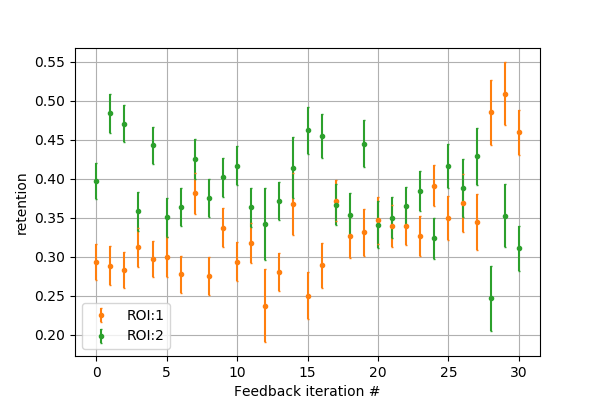

In [9]:
savefig=False
colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728','#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
fig, ax = plt.subplots()
fig.set_size_inches(6,4)
fit_guesses=[30,0.4,2,0,0.5]
roi_dependency=[0,0,0,0,0]
fitted_parameters=[]
for roi in [1,2]:
    error=0
    data = []
    reten = []
    err = []
    for e in range(len(np.squeeze(retention['ivar']))):
        data.append(np.squeeze(retention['ivar'])[e][roi])
        reten.append(np.squeeze(retention['retention'])[e][roi])
        err.append(np.squeeze(retention['error'])[e][roi])
    ax.errorbar(data,reten,yerr=err,label="ROI:{}".format(roi),fmt='o',markersize=3,color=colors[roi],capsize=1)
#     guesses=np.add(fit_guesses,np.ones(len(fit_guesses))*(roi-2)*roi_dependency)
#     try:
#         fit,pcov = curve_fit(decaying_sin,data,reten,guesses)
#     except RuntimeError:
#         error=1
#     if error is not 1:
#         print "ROI:{}, tau : {}, amplitude {} , freq:{}, phase:{}, offset:{}".format(roi,fit[0],fit[1],fit[2],fit[3],fit[4])
#         fitted_parameters.append(fit[0])
#         xarray=np.linspace(np.min(data),np.max(data),100)
#         yfit=decaying_sin(xarray, fit[0],fit[1],fit[2],fit[3],fit[4])
#         plt.plot(xarray,yfit,label="ROI:{}".format(roi),color=colors[roi])

plt.show()
#ax.set_title(exp_id)
#ax.set_ylim(0, 1.05)
#ax.set_xlim(-0.5,)
ax.grid()
#ax.set_xlabel(xlab)
ax.set_xlabel('Feedback iteration #')
ax.set_ylabel('retention')
ax.legend()
if savefig:
    fig.savefig(exp_id+'atom_Retention.pdf')
    fig.savefig(exp_id+'atom_Retention.png')

In [ ]:
Estimation of freq change